# Introduction

Strava data analysis, which assumes the Strava data has been retrieved for a specific user using the Strava API. See the project README for more information.

First step, import stuff.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import thinkplot
import thinkstats2
import numpy as np
import statsmodels.formula.api as smf
import warnings


In [4]:
# Load the data and show a little of it - it's the raw data
all_strava_data = pd.read_csv('All_Strava_Data.csv')
print(all_strava_data.head(5))

                          name  distance  distance_mi  moving_time  \
0                   NYC - BLAH   21324.6    13.250492         2719   
1               20x1:00x20x7+1       0.0     0.000000          120   
2  Tour de Zwift - Stage 5 (B)   33132.6    20.587643         3289   
3                          NYC    3149.0     1.956698          421   
4               20x1:00x20x6+1       0.0     0.000000          120   

   elapsed_time  total_elevation_gain  elevation_gain_ft         type  \
0          2719                 361.0         1184.38324  VirtualRide   
1           120                   0.0            0.00000      Workout   
2          3289                 262.0          859.58008  VirtualRide   
3           546                  28.0           91.86352  VirtualRide   
4           120                   0.0            0.00000      Workout   

             start_date  trainer  ...  average_speed avg_speed_mph  max_speed  \
0  2019-01-16T21:31:24Z    False  ...          7.843     17

## First Cuts are the Deepest

The data has a lot more types of activities than required for a cycling analysis. I want only useful cycling activities, which means I do NOT want stationary bike data that has not power or cadence matrics. The `gear_id` attribute is the specific bike, which I defined in Strava over the years (for each bike I own(ed)).

In [5]:
strava_data = all_strava_data[
    ((all_strava_data.type == 'Ride') | (all_strava_data.type == 'VirtualRide')) &
    ((all_strava_data.gear_id == 'b1477130') |
     (all_strava_data.gear_id == 'b2653090') |
     (all_strava_data.gear_id == 'b575984') |
     (all_strava_data.gear_id == 'b1395475') |
     (all_strava_data.gear_id == 'b250312') |
     (all_strava_data.gear_id == 'b249850') |
     (all_strava_data.gear_id == 'b250313') |
     (all_strava_data.gear_id == 'b266100') |
     (all_strava_data.gear_id == 'b350107') |
     (all_strava_data.gear_id == 'b635473') |
     (all_strava_data.gear_id == 'b1108192') |
     (all_strava_data.gear_id == 'b2468160')
    )
]

## Start the Analysis - Get Data

With the right subset of data (more or less), I am assigning features to variables so I can more easily work with them.

In [6]:
distance_mi = strava_data['distance_mi']
moving_time = strava_data['moving_time']
total_elevation_gain = strava_data['total_elevation_gain']
gear = strava_data['gear_id']
average_speed_mph = strava_data['avg_speed_mph']
average_watts = strava_data['average_watts']
average_heartrate = strava_data['average_heartrate']
average_temp = strava_data['average_temp']

## Histograms

First, create a re-usable histogram function and then create the graphics for key variables.

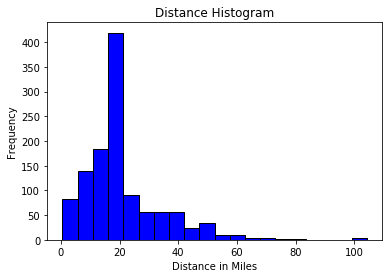

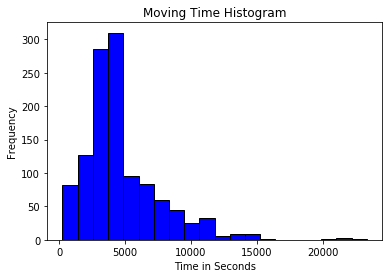

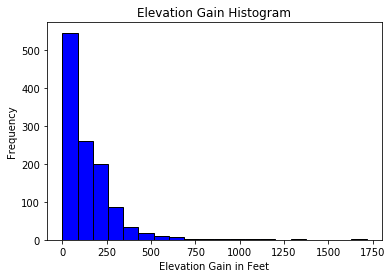

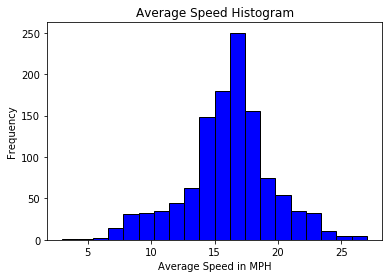

C:\Users\neugg\.conda\envs\py35\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\neugg\.conda\envs\py35\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


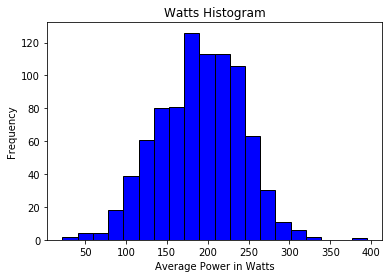

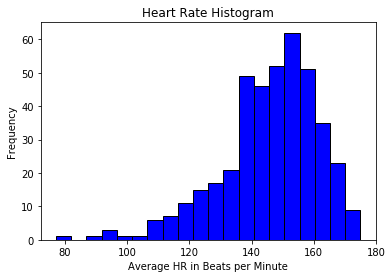

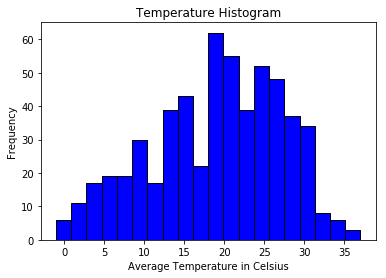

In [10]:
def my_histogram(data, color, edgecolor, bins, title, label):
    plt.hist(data, color=color, edgecolor=edgecolor, bins=bins)
    plt.title(title)
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.show()

my_histogram(distance_mi, 'blue', 'black', 20, 'Distance Histogram', 'Distance in Miles')
my_histogram(moving_time, 'blue', 'black', 20, 'Moving Time Histogram', 'Time in Seconds')
my_histogram(total_elevation_gain, 'blue', 'black', 20, 'Elevation Gain Histogram', 'Elevation Gain in Feet')
my_histogram(average_speed_mph, 'blue', 'black', 20, 'Average Speed Histogram', 'Average Speed in MPH')
my_histogram(average_watts, 'blue', 'black', 20, 'Watts Histogram', 'Average Power in Watts')
my_histogram(average_heartrate, 'blue', 'black', 20, 'Heart Rate Histogram', 'Average HR in Beats per Minute')
my_histogram(average_temp, 'blue', 'black', 20, 'Temperature Histogram', 'Average Temperature in Celsius')

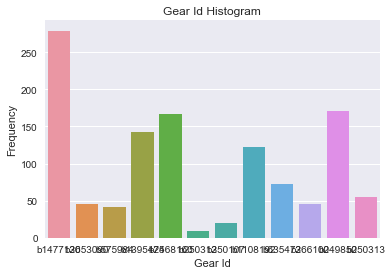

In [11]:
# gear_id is categorical and has to be handled differently.
sns.set(style='darkgrid')
sns.countplot(x='gear_id', data=strava_data)
plt.title('Gear Id Histogram')
plt.xlabel('Gear Id')
plt.ylabel('Frequency')
plt.show()

## Descriptive Statistics

Distance in Miles 
Mean:  20.91 
Median:  17.96 
Mode:  17.00003231 
Spread:  181.08 
Std Dev:  13 



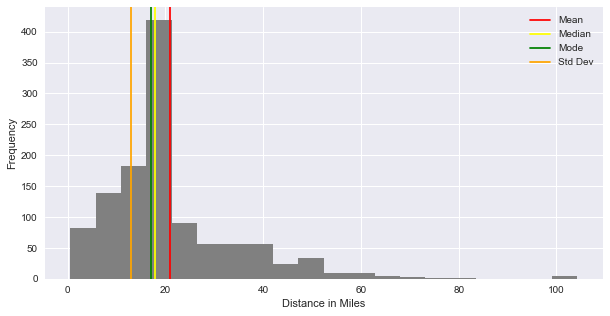

Moving Time in Seconds 
Mean:  4698.61 
Median:  4080.5 
Mode:  3600 
Spread:  8510995.19 
Std Dev:  2917 



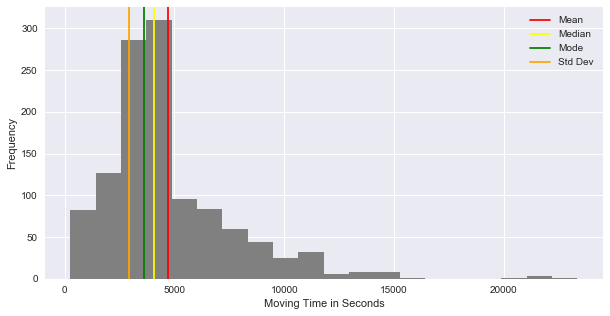

Total Elevation Gain 
Mean:  131.26 
Median:  96.0 
Mode:  0.0 
Spread:  24485.21 
Std Dev:  156 



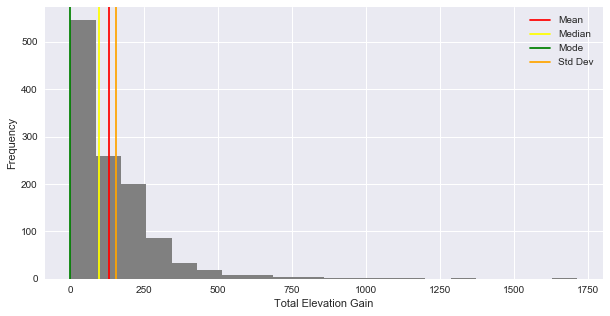

Average Speed in MPH 
Mean:  16.14 
Median:  16.5 
Mode:  17.000744 
Spread:  11.81 
Std Dev:  3 



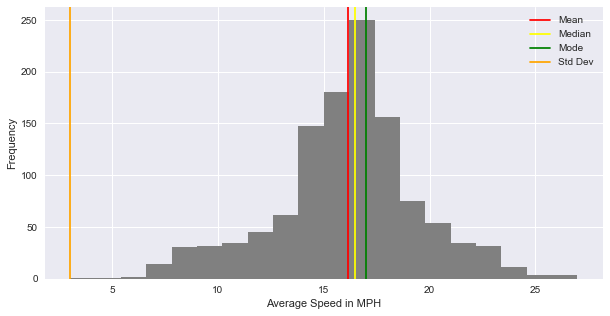

Average Power in Watts 
Mean:  190.52 
Median:  192.95 
Mode:  185.2 
Spread:  2596.75 
Std Dev:  51 



C:\Users\neugg\.conda\envs\py35\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\neugg\.conda\envs\py35\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


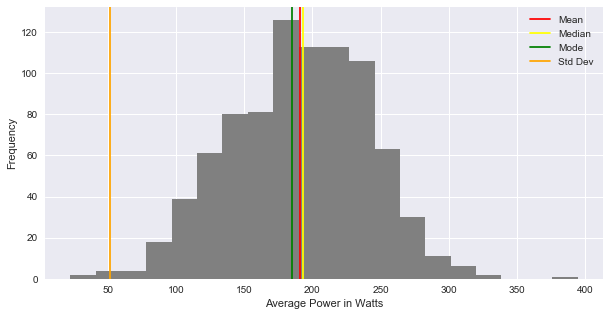

Average Heart Rate 
Mean:  145.92 
Median:  148.4 
Mode:  138.0 
Spread:  242.46 
Std Dev:  16 



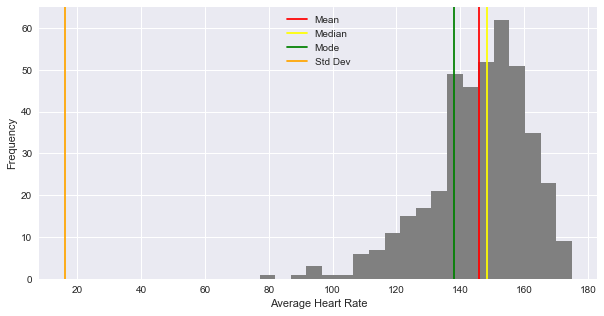

Average Temperature in Celsius 
Mean:  18.94 
Median:  19.0 
Mode:  19.0 
Spread:  66.06 
Std Dev:  8 



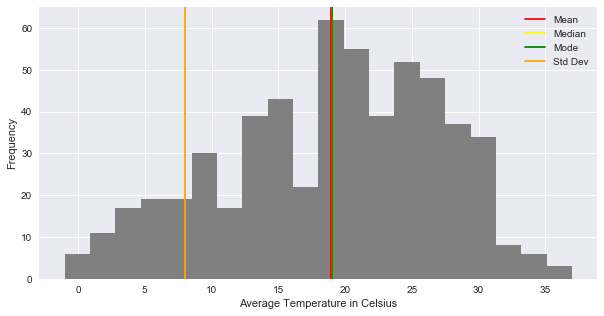

In [13]:
def desc_stats(data, xlabel):
    mean = round(data.mean(), 2)
    median = round(data.median(), 2)
    mode = data.mode()
    spread = round(data.var(), 2)
    sd = round(data.std())
    print(xlabel, '\nMean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0],'\nSpread: ',spread, '\nStd Dev: ', sd, '\n')
    plt.figure(figsize=(10,5))
    plt.hist(data,bins=20,color='grey')
    plt.axvline(mean,color='red',label='Mean')
    plt.axvline(median,color='yellow',label='Median')
    plt.axvline(mode[0],color='green',label='Mode')
    plt.axvline(sd,color='orange',label='Std Dev')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

desc_stats(distance_mi, 'Distance in Miles')
desc_stats(moving_time, 'Moving Time in Seconds')
desc_stats(total_elevation_gain, 'Total Elevation Gain')
desc_stats(average_speed_mph, 'Average Speed in MPH')
desc_stats(average_watts, 'Average Power in Watts')
desc_stats(average_heartrate, 'Average Heart Rate')
desc_stats(average_temp, 'Average Temperature in Celsius')

## PMF - Describe This

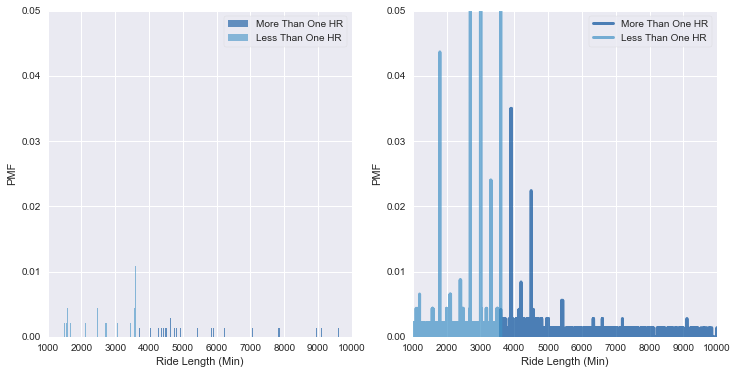

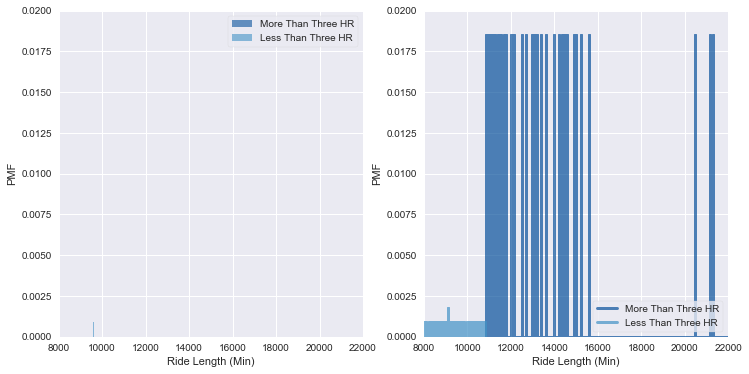

<Figure size 576x432 with 0 Axes>

In [14]:
def pmf_stuff(width, x_low, x_high, third, pmf_one, pmf_two, label, y_axis_scale):
    width=width
    axis=[x_low, x_high, third, y_axis_scale]
    thinkplot.PrePlot(2, cols=2)
    thinkplot.Hist(pmf_one, align='right', width=width)
    thinkplot.Hist(pmf_two, align='left', width=width)
    thinkplot.Config(xlabel=label, ylabel='PMF', axis=axis)

    thinkplot.PrePlot(2)
    thinkplot.SubPlot(2)
    thinkplot.Pmfs([pmf_one, pmf_two])
    thinkplot.Config(xlabel=label, ylabel='PMF', axis=axis)
    thinkplot.Show()

over_one_hr = moving_time[moving_time > 3600]
less_one_hr = moving_time[moving_time <= 3600]

pmf_more = thinkstats2.Pmf(over_one_hr, label='More Than One HR')
pmf_less = thinkstats2.Pmf(less_one_hr, label="Less Than One HR")

pmf_stuff(1, 1000, 10000, 0, pmf_more, pmf_less, 'Ride Length (Min)', 0.05)

over_three_hr = moving_time[moving_time > 10800]
less_three_hr = moving_time[moving_time <= 10800]
pmf_more = thinkstats2.Pmf(over_three_hr, label="More Than Three HR")
pmf_less = thinkstats2.Pmf(less_three_hr, label='Less Than Three HR')
pmf_stuff(1, 8000, 22000, 0, pmf_more, pmf_less, 'Ride Length (Min)', 0.02)

## CDF - EXPLAIN THIS

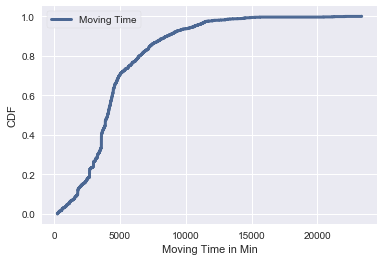

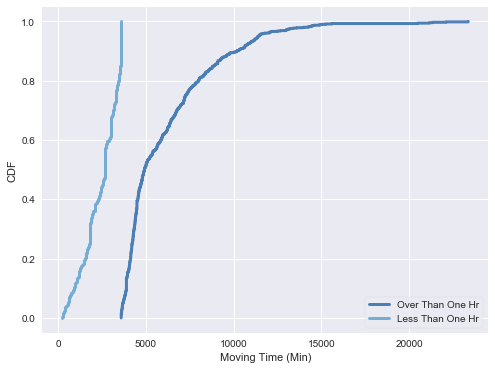

<Figure size 576x432 with 0 Axes>

In [15]:
cdf = thinkstats2.Cdf(moving_time, label='Moving Time')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Moving Time in Min', ylabel='CDF')

more_cdf = thinkstats2.Cdf(over_one_hr, label='Over Than One Hr')
less_cdf = thinkstats2.Cdf(less_one_hr, label='Less Than One Hr')
thinkplot.PrePlot(2)
thinkplot.Cdfs([more_cdf, less_cdf])
thinkplot.Show(xlabel='Moving Time (Min)', ylabel='CDF')

## Making Normal Distributions

Many of the features are not normally distributed, but we can fix that.

n, mean, std 860 190.54443127962085 47.7017837235795


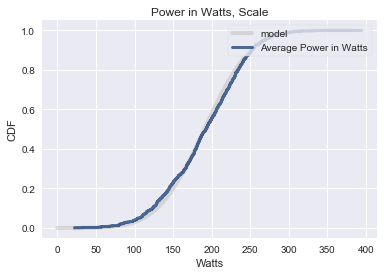

n, mean, std 860 2.2646867868926317 0.11957445310355921


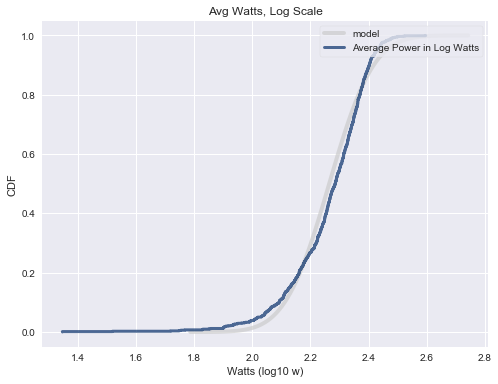

n, mean, std 1172 20.508489119044352 11.924644335463912


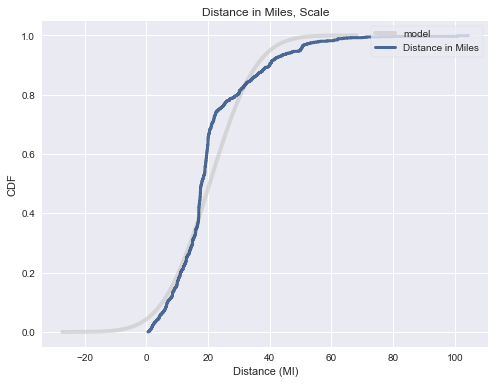

n, mean, std 1172 1.2332572831921516 0.2829366519210949


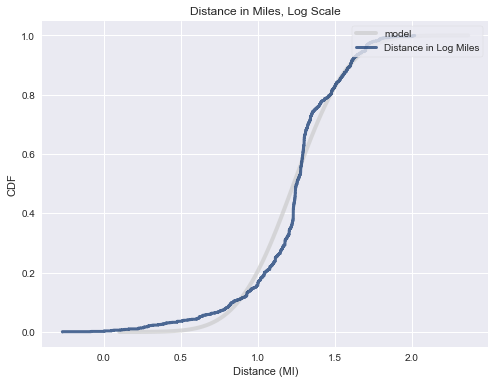

n, mean, std 1172 1.2332572831921516 0.2829366519210949


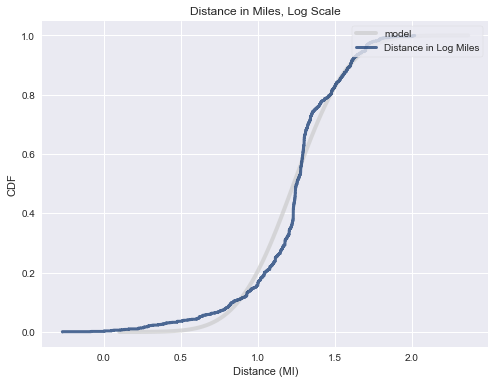

<Figure size 576x432 with 0 Axes>

In [17]:
avg_watts = average_watts.dropna()

def MakeNormalModel(data, label):
    cdf = thinkstats2.Cdf(data, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(data)
    std = np.sqrt(var)
    print('n, mean, std', len(data), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

# Watts
MakeNormalModel(avg_watts, 'Average Power in Watts')
thinkplot.Config(title='Power in Watts, Scale', xlabel='Watts',
                 ylabel='CDF', loc='upper right')
thinkplot.Show()

# Log Watts
log_watts = np.log10(avg_watts)
MakeNormalModel(log_watts, 'Average Power in Log Watts')
thinkplot.Config(title='Avg Watts, Log Scale', xlabel='Watts (log10 w)',
                 ylabel='CDF', loc='upper right')
thinkplot.Show()

# Distance in MI
MakeNormalModel(distance_mi, 'Distance in Miles')
thinkplot.Config(title='Distance in Miles, Scale', xlabel='Distance (MI)',
                 ylabel='CDF', loc='upper right')
thinkplot.Show()

# Log Watts
log_dist = np.log10(distance_mi)
MakeNormalModel(log_dist, 'Distance in Log Miles')
thinkplot.Config(title='Distance in Miles, Log Scale', xlabel='Distance (MI)',
                 ylabel='CDF', loc='upper right')
thinkplot.Show()

log_dist = np.log10(distance_mi)
MakeNormalModel(log_dist, 'Distance in Log Miles')
thinkplot.Config(title='Distance in Miles, Log Scale', xlabel='Distance (MI)',
                 ylabel='CDF', loc='upper right')
thinkplot.Show()

## Sampling, Plotting Sample, Covariance, and Correlation

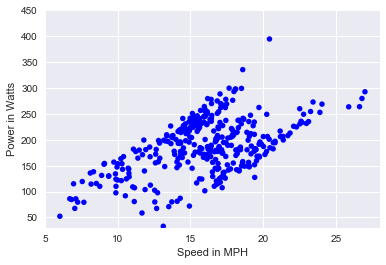

0.5060841860005226


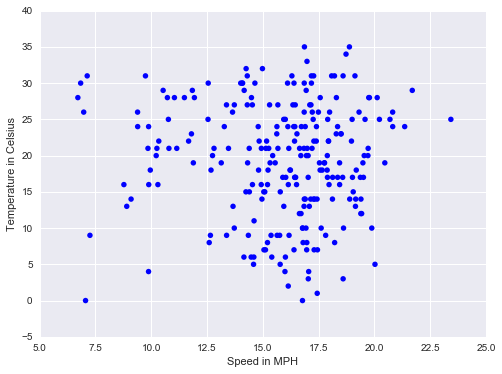

0.04837189618305244


<Figure size 576x432 with 0 Axes>

In [18]:
def random_sample(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

def plot_sample(x_data, y_data, x_label, y_label, axis):
    thinkplot.Scatter(x_data, y_data, alpha=1)
    thinkplot.Config(xlabel=x_label,
                 ylabel=y_label,
                 axis=axis,
                 legend=False)
    thinkplot.Show()

def covariance (xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = covariance(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

sample = random_sample(strava_data, 500)

# Speed / Power
speed, watts = sample.avg_speed_mph, sample.average_watts
plot_sample(speed, watts, 'Speed in MPH', 'Power in Watts', [5, 28, 30, 450])
# Need only records where watts is > 0
strava_data_with_watts = strava_data[
    (strava_data.average_watts > 0)]
print(corr(strava_data_with_watts.avg_speed_mph, strava_data_with_watts.average_watts))

# Speed / Temperature
speed, temp = sample.avg_speed_mph, sample.average_temp
plot_sample(speed, temp, 'Speed in MPH', 'Temperature in Celsius', [5, 25, -5, 40])
# Need only records where temperature exists
strava_data_with_temp = strava_data[
    (strava_data.average_temp.notnull())]
print(corr(strava_data_with_temp.avg_speed_mph, strava_data_with_temp.average_temp))

## Correlation Permutation ???

In [19]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

cleaned_data = strava_data.dropna(subset=['avg_speed_mph', 'average_watts'])
data = cleaned_data.avg_speed_mph.values, cleaned_data.average_watts.values
corr_perm = CorrelationPermute(data)
pvalue = corr_perm.PValue()
print(pvalue)
print(corr_perm.actual, corr_perm.MaxTestStat())

0.0
0.5060841860005226 0.11972402154309292


## Linear Regression Model

In [20]:
reg_formula = 'avg_speed_mph ~ average_watts'
model = smf.ols(reg_formula, data=strava_data)
results = model.fit()
print(results.summary())
print('Intercept:', results.params['Intercept'])
print('Slope:', results.params['average_watts'])
print('Slope p-value:', results.pvalues['average_watts'])
print('R-Squared:', results.rsquared)

reg_formula = 'avg_speed_mph ~ average_watts + total_elevation_gain + moving_time + average_temp'
model = smf.ols(reg_formula, data=strava_data)
results = model.fit()
print(results.summary())
print('Intercept:', results.params['Intercept'])
print('Slope:', results.params['average_watts'])
print('Slope p-value:', results.pvalues['average_watts'])
print('R-Squared:', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:          avg_speed_mph   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     295.4
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           4.02e-57
Time:                        16:50:25   Log-Likelihood:                -2181.5
No. Observations:                 860   AIC:                             4367.
Df Residuals:                     858   BIC:                             4376.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.1224      0.404     22.569